# Lab 10: Softmax Function (multi-class classification)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex

from sklearn.datasets import make_blobs

# %matplotlib widget
from matplotlib.widgets import Slider

from lib.lab_utils_common import dlc
from lib.lab_utils_softmax import plt_softmax

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
def my_softmax(z):
    ez = np.exp(z)              #element-wise exponenial
    sm = ez/np.sum(ez)
    return(sm)

## Play with values of Z

As you are varying the values of the z's above, there are a few things to note:
* the exponential in the numerator of the softmax magnifies small differences in the values
* the output values sum to one
* the softmax spans all of the outputs. A change in z0 for example will change the values of a0-a3. Compare this to other activations such as ReLU or Sigmoid which have a single input and single output.

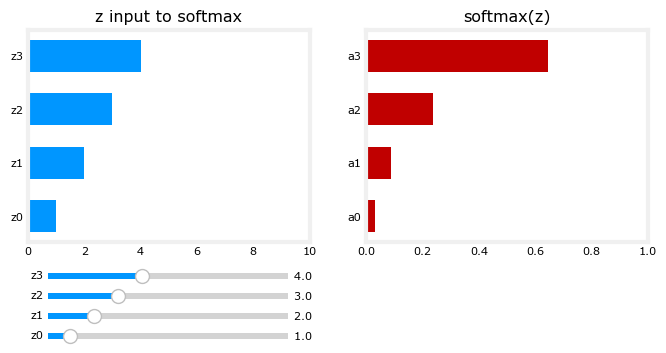

In [3]:
# Vary the values of z inputs using the sliders
plt.close("all")
plt_softmax(my_softmax)

## Softmax with tensorflow

In [17]:
# Setup data

centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

### Non-optimized / Non-preferred

In [6]:
# Train model

model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')    # < softmax activation here
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001), # adds Adam algorithm to make gradient descent faster
)

model.fit(
    X_train,y_train,
    epochs=10
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 1.2662 
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 0.5584
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 0.2430
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 0.1406
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 0.0818
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 0.0727
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.0717
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 0.0508
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 0.0521
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 0.0429


#### Outputs are probabilities

Because the softmax is integrated into the output layer, the output is a vector of probabilities corresponding to the possible classes / categories.
To determine the result, simply select the largest probability in the output vector.

In [10]:
# Make predictions

p_nonpreferred = model.predict(X_train)

print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
[[1.81e-03 2.38e-03 9.74e-01 2.15e-02]
 [9.95e-01 4.73e-03 2.22e-04 3.90e-05]]
largest value 0.9999993 smallest value 2.6129706e-08


### Optimized / Preferred
More stable and accurate results can be obtained if the softmax and loss are combined during training.

In the preferred organization the final layer has a linear activation. 

For historical reasons, the outputs in this form are referred to as logits. The loss function has an additional argument: from_logits = True. This informs the loss function that the softmax operation should be included in the loss calculation. This allows for an optimized implementation.

In [11]:
# Train model

preferred_model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')   #<-- Note
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001), # adds Adam algorithm to make gradient descent faster
)

preferred_model.fit(
    X_train,y_train,
    epochs=10
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 1.4936 
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.7878
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 0.5873
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 0.3309
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 0.1599
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 0.1030
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 0.0756
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.0573
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 0.0569
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 0.0471


#### Outputs are not probabilities

In the preferred model, outputs are not probabilities, but can range from large negative numbers to large positive numbers. The output must be sent through a softmax when performing a prediction that expects a probability.

In [13]:
# Make predicitons; initially does not yield probabilities

p_preferred = preferred_model.predict(X_train)

print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
two example output vectors:
 [[-2.82 -2.19  2.68 -1.4 ]
 [ 4.74 -0.29 -2.71 -8.53]]
largest value 14.5980015 smallest value -17.73716


In [18]:
# Send results through softmax to get probabilities (corresponding to the different possible classes)

sm_preferred = tf.nn.softmax(p_preferred).numpy()

print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[4.00e-03 7.49e-03 9.72e-01 1.65e-02]
 [9.93e-01 6.53e-03 5.78e-04 1.72e-06]]
largest value 0.99999976 smallest value 9.057714e-15


In [20]:
# For each example, select the class for which that example has the largest resulting probability

for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-2.82 -2.19  2.68 -1.4 ], category: 2
[ 4.74 -0.29 -2.71 -8.53], category: 0
[ 3.41  0.11 -2.16 -6.68], category: 0
[-1.92  4.54 -1.83 -2.17], category: 1
[-0.55 -2.43  3.52 -4.27], category: 2


## SparseCategorialCrossentropy or CategoricalCrossEntropy

Tensorflow has two potential formats for target values and the selection of the loss defines which is expected.
* SparseCategorialCrossentropy: expects the target to be an integer corresponding to the index. For example, if there are 10 potential target values, y would be between 0 and 9.
* CategoricalCrossEntropy: Expects the target value of an example to be one-hot encoded where the value at the target index is 1 while the other N-1 entries are zero. An example with 10 potential target values, where the target is 2 would be [0,0,1,0,0,0,0,0,0,0].